In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
two_blobs = pd.read_csv('DATA/cluster_two_blobs.csv')

In [68]:
two_blobs_outliers = pd.read_csv('DATA/cluster_two_blobs_outliers.csv')

<Axes: xlabel='X1', ylabel='X2'>

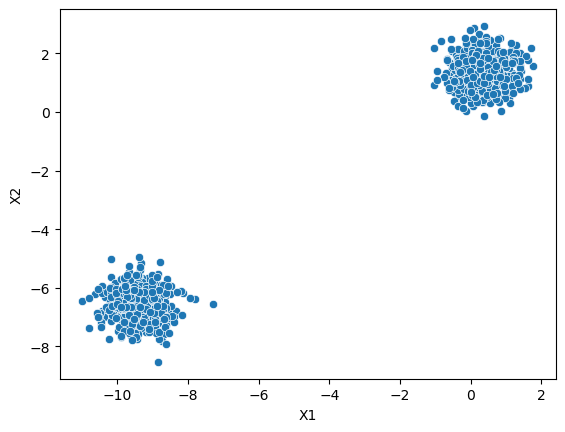

In [69]:
sns.scatterplot(data=two_blobs, x='X1', y='X2')

In [70]:
two_blobs

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215
...,...,...
995,-9.895227,-6.644544
996,-9.544007,-6.060362
997,0.713958,1.560460
998,0.954444,0.889178


<Axes: xlabel='X1', ylabel='X2'>

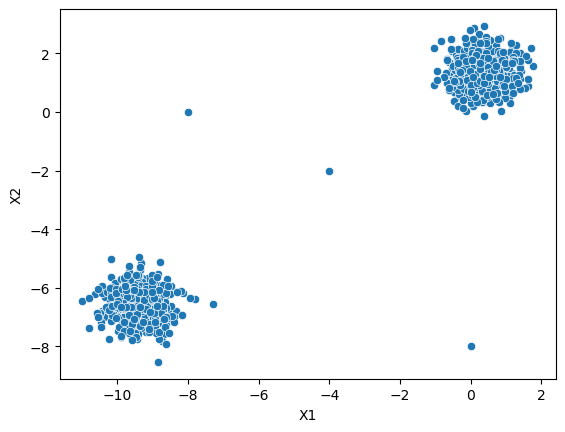

In [71]:
sns.scatterplot(data=two_blobs_outliers, x='X1', y='X2')

In [72]:
two_blobs_outliers

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215
...,...,...
998,0.954444,0.889178
999,-8.867767,-5.635758
1000,-4.000000,-2.000000
1001,0.000000,-8.000000


In [73]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set1')

In [74]:
from sklearn.cluster import DBSCAN

In [75]:
dbscan = DBSCAN()

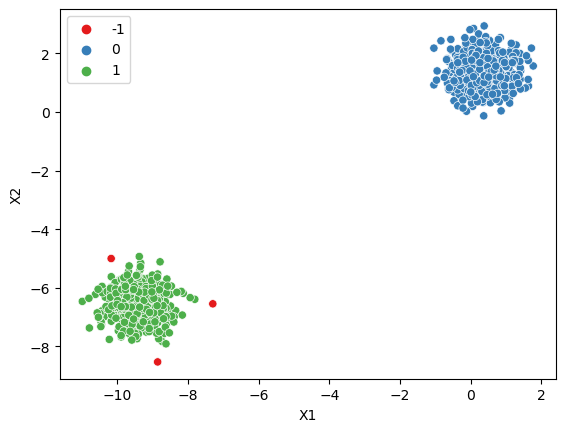

In [76]:
display_categories(dbscan, two_blobs)

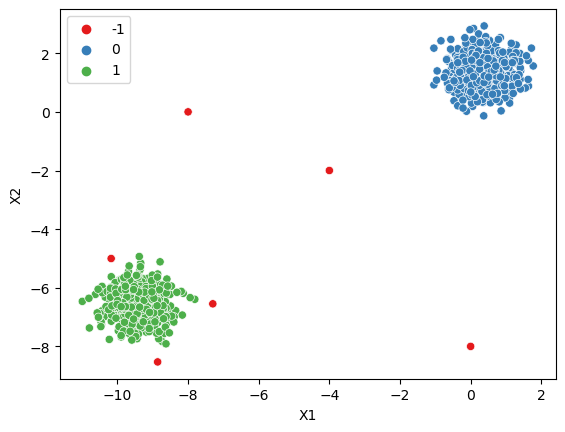

In [77]:
display_categories(dbscan, two_blobs_outliers)

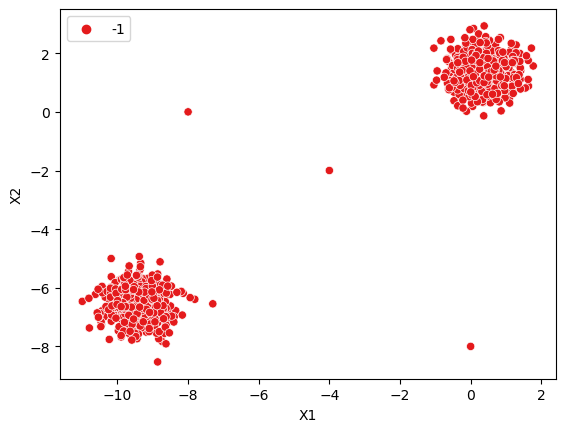

In [78]:
dbscan = DBSCAN(eps=0.001)
display_categories(dbscan, two_blobs_outliers)

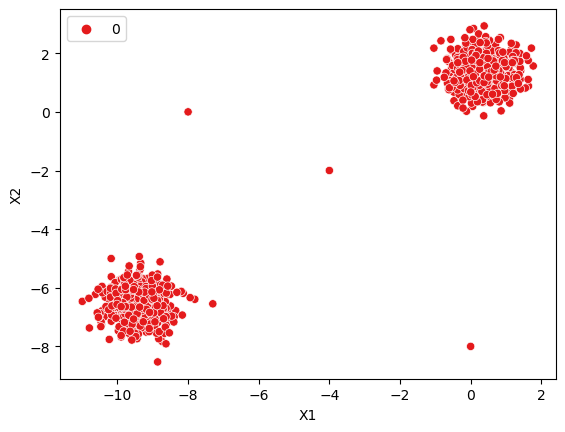

In [79]:
dbscan = DBSCAN(eps=10)
display_categories(dbscan, two_blobs_outliers)

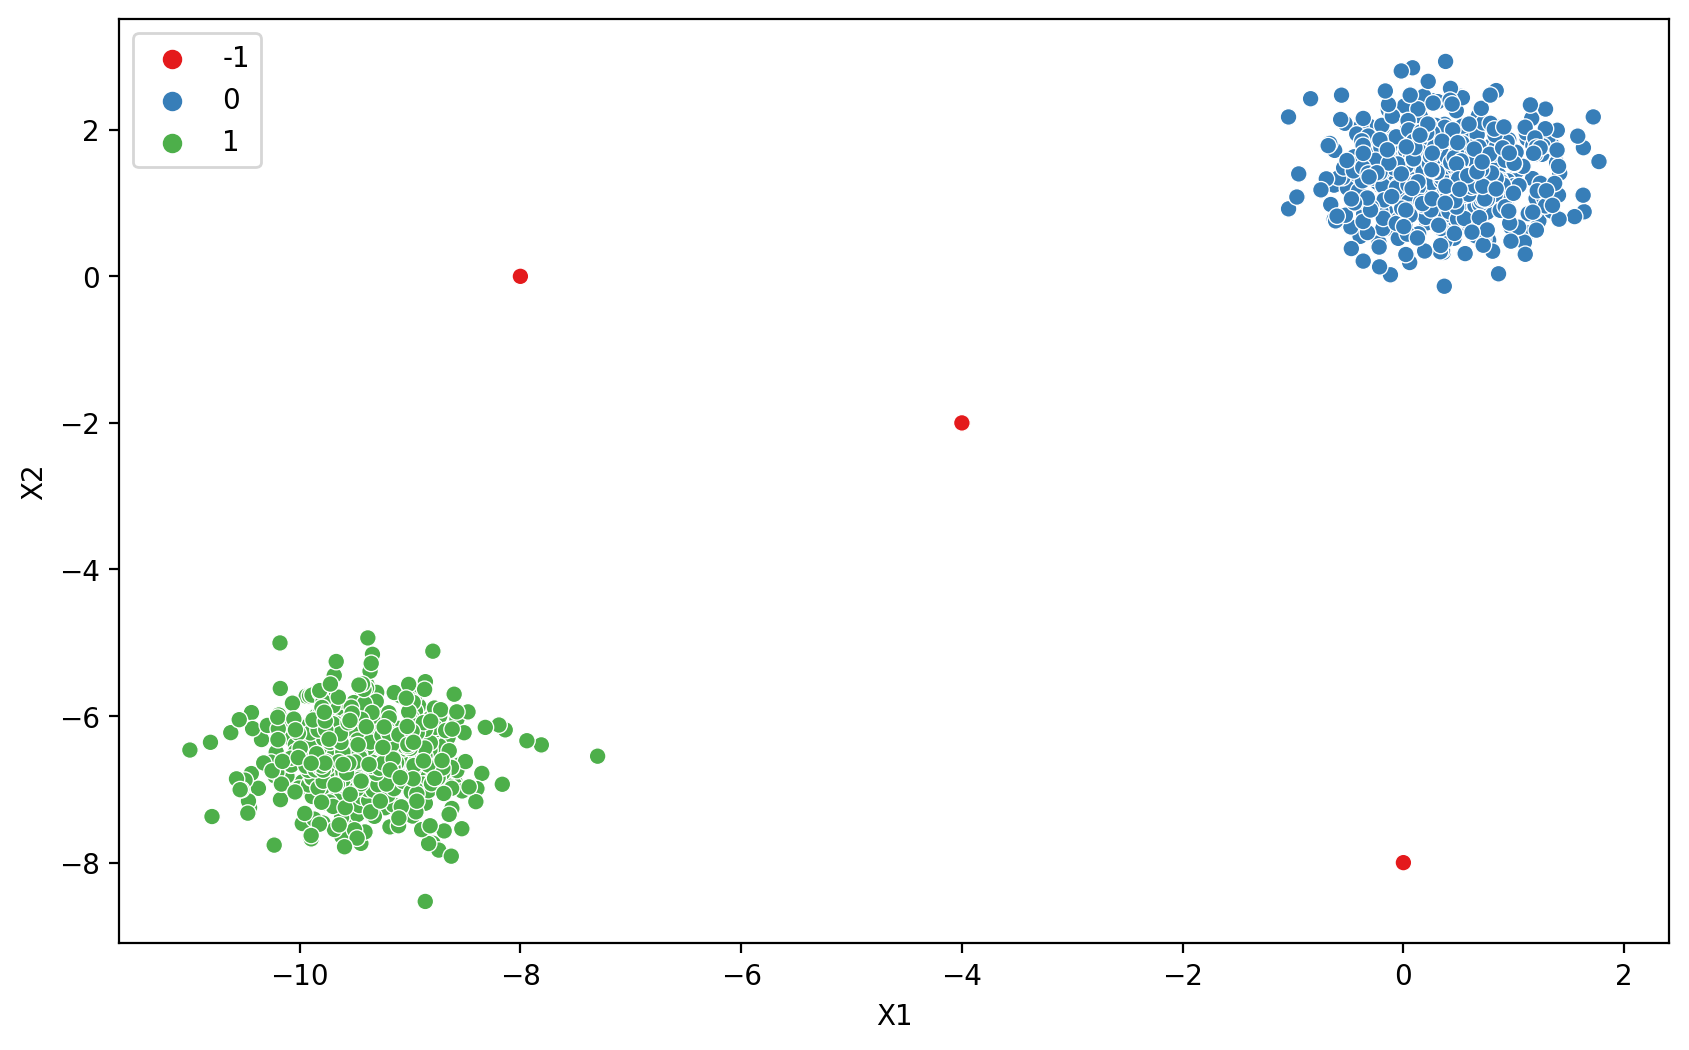

In [80]:
plt.figure(figsize=(10, 6), dpi=200)
dbscan = DBSCAN(eps=1)
display_categories(dbscan, two_blobs_outliers)

In [81]:
np.unique(dbscan.labels_)

array([-1,  0,  1], dtype=int64)

In [82]:
dbscan.labels_ == -1

array([False, False, False, ...,  True,  True,  True])

In [83]:
#total outliers found
np.sum(dbscan.labels_ == -1)

3

In [84]:
100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

0.29910269192422734

In [85]:
len(dbscan.labels_)

1003

In [86]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001, 10, 100):
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

(0.0, 2.0)

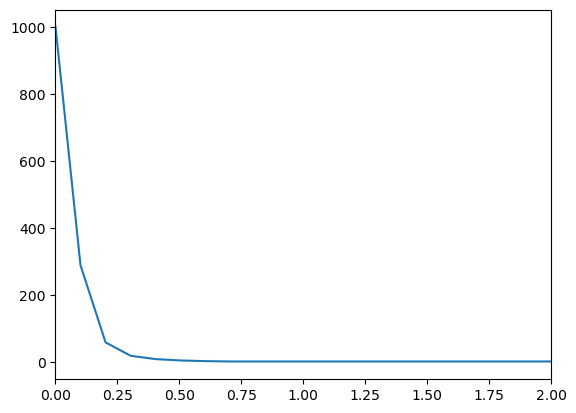

In [87]:
sns.lineplot(x=np.linspace(0.001, 10, 100), y=number_of_outliers)
plt.xlim(0, 2)

In [88]:
#dbscan = DBSCAN(eps=5)
#display_categories(dbscan, two_blobs_outliers)

In [89]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001, 10, 100):
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

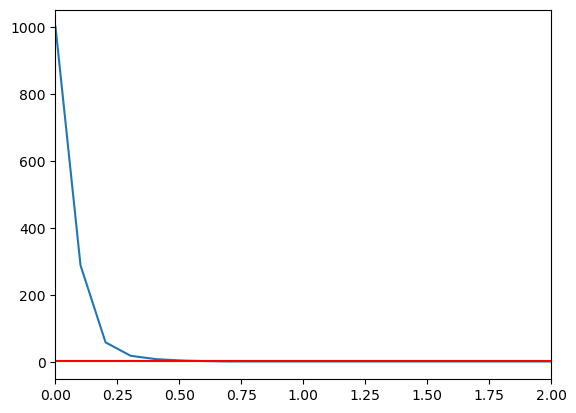

In [90]:
#sns.lineplot(x=np.linspace(0.001, 10, 100), y=number_of_outliers)
#plt.xlim(0, 2)
#plt.hlines(y=3, xmin=0, xmax=2, color='red')

Text(0, 0.5, 'Percent of points')

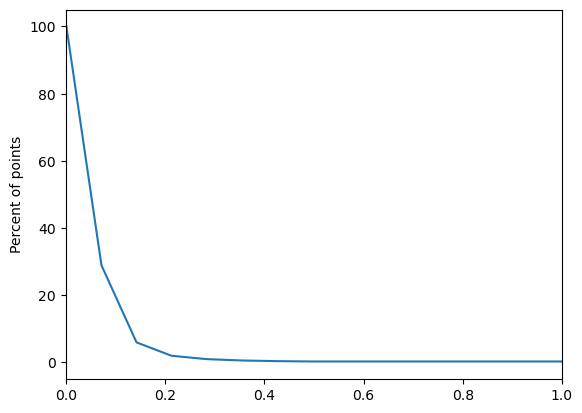

In [94]:
sns.lineplot(x=np.linspace(0.001, 7, 100), y=outlier_percent)
plt.xlim(0, 1)
plt.ylabel('Percent of points')

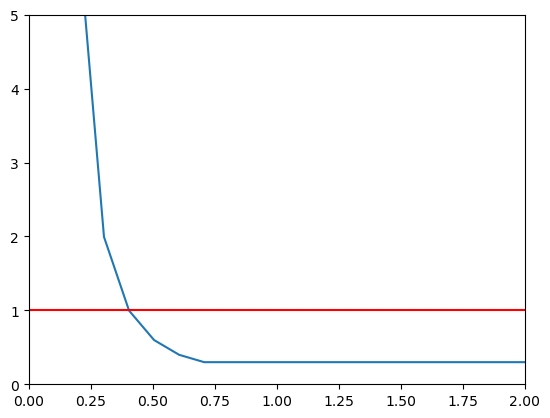

In [96]:
sns.lineplot(x=np.linspace(0.001, 10, 100), y=outlier_percent)
plt.xlim(0, 2)
plt.ylim(0, 5)
plt.hlines(y=1, xmin=0, xmax=2, color='red')

In [98]:
#sns.lineplot(x=np.linspace(0.001, 1, 200), y=number_of_outliers)
#plt.xlim(0, 2)
#plt.ylim(0, 10)
#plt.hlines(y=1, xmin=0, xmax=2, color='red')

In [101]:
outlier_percent = []
number_of_outliers = []

for n in np.arange(1, 100):
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)
    
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

Text(0, 0.5, 'Pct. of points classified as an outlier')

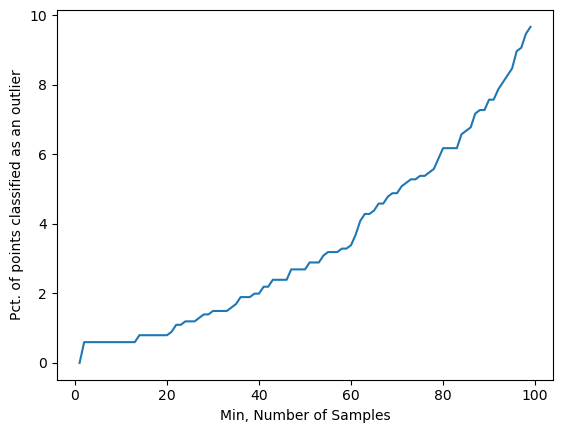

In [103]:
sns.lineplot(x=np.arange(1, 100), y=outlier_percent)
plt.xlabel('Min, Number of Samples')
plt.ylabel('Pct. of points classified as an outlier')

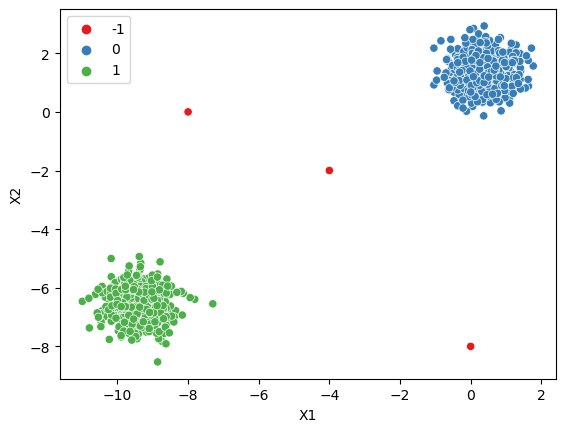

In [106]:
num_dim = two_blobs_outliers.shape[1]
dbscan = DBSCAN(min_samples=2*num_dim, eps=0.75)
display_categories(dbscan, two_blobs_outliers)